In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; fo
nt-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:130px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size = "5" color = 'red' > ch10 n차원 배열 다루기 </font>`

# 4절 복사와 뷰

## 4.1 할당

In [3]:
import numpy as np

In [17]:
c = np.arange(12).reshape(2,-1)
display(c)
a = np.arange(6)
display(a)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

array([0, 1, 2, 3, 4, 5])

In [22]:
b = a
id(b), id(a), 

(2581422601776, 2581422601776)

In [23]:
# a와 b가 같은 객체인가
a is b

True

In [26]:
b.shape = (2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(view)
- 슬라이싱 할 경우 view 생성

In [27]:
c = np.arange(12).reshape(2,-1)
display(c)
a = np.arange(6)
display(a)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

array([0, 1, 2, 3, 4, 5])

In [37]:
d = c.view() # d는 c.view()를 통해 c가 가르키는 주소를 볼 수 있다 c의 view를 생성
d is c, id(c), id(d)

(False, 2581422600240, 2581422602064)

In [38]:
d == c # c와 d의 내용이 모두 같음

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [39]:
d.shape

(2, 6)

In [44]:
d.shape = (3,4)
d, c

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]]))

In [45]:
d[0,::2] = - 99
d 

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [46]:
c

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

view()는 본 구조는 사용하지 않고 값만 사용한다 =>얕은 복사의 일종 : 슬라이싱도 뷰와 동일하게 작동한다

 데이터를 복사하지 않고 **같은 메모리(buffer)** 를 공유하면서 다른 형태나 타입으로 배열을 볼 수 있게 해주는 기능

즉, "같은 데이터를 다른 시선으로 본다"

In [47]:
# 슬라이싱이 될 때 자동 뷰 반환
c = np.arange(12).reshape(2,-1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [48]:
d = c[:,:-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [50]:
d[..., -1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [51]:
c

array([[ 0,  1,  2,  3, 99,  5],
       [ 6,  7,  8,  9, 99, 11]])

## 4.3 깊은 복사

In [52]:
c = np.arange(12).reshape(2,-1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [54]:
d = c[:, :-1].copy()

In [61]:
d, c is d # False

(array([[ 0,  1,  2,  3, 99],
        [ 6,  7,  8,  9, 99]]),
 False)

In [58]:
d[:,-1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [59]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절 고급인덱싱

## 5.1 인덱스 배열로 인덱싱

In [62]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [66]:
a[[0,0,1, 1,5]] # 불규칙적인 값들을 가져올 수 도 있음 -> 인덱스로 인덱스배열이 가능하다

array([ 0,  0,  1,  1, 25])

In [72]:
# 인덱싱 하기 위한 값을 배열로 만듦
i = np.array([0,0,1,5])
a[i]

array([ 0,  0,  1, 25])

In [75]:
# 인덱싱 하기 위한 값을 2차원 배열로 만듦
j = np.array([[0, 0],
               [1, 5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [99]:
                #    R G B
palette = np.array([[0,0,0,], # black
                   [255,0,0,], # Red
                   [0,255,0,], # Green
                   [0,0,255,], # Blue
                   [255,255,255]]) # whilte
print(palette.shape)

(5, 3)


In [100]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4,],
                        [4,0,0,4,4,4,4,0,0,4,],
                        [0,0,4,4,4,4,4,4,0,0,],
                        [0,4,4,1,4,4,3,4,4,0,],
                        [0,4,4,1,4,4,3,4,4,0,],
                        [0,4,4,4,4,4,4,4,4,0,],
                        [0,4,4,2,4,4,2,4,4,0,],
                        [4,0,4,4,2,2,4,4,0,4,],
                        [4,4,0,4,4,4,4,0,4,4,],
                        [4,4,4,0,0,0,0,4,4,4,],])
print(image_index.shape)
img_idx = np.array([[4,0],
                   [0,4]])

(10, 10)


In [101]:
image_data = palette[image_index]
print(image_data.shape) #(10, 10, 3) 가로 10 세로 10 색깔
# palette 배열의 image_index의 배열 속 인덱스 수를 반환해서 image_index형태로 만들어라
# img_dt = palette[img_idx]

(10, 10, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

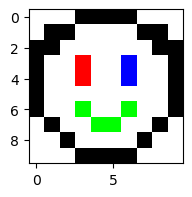

In [108]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.figure(figsize = (2,2))
plt.imshow(image_data)
plt.show
# plt.imshow(img_dt, interpolation='nearest')
# plt.show

In [103]:
image_data.ndim

3

## 5.2 논리 배열을 이용한 인덱싱

In [116]:
a = np.array([0,1,10,11,12,13,14,15,99])

In [129]:
a%2 == 0 # 논리 배열

array([ True, False,  True, False,  True, False,  True, False, False])

In [130]:
a[[ True, False,  True, False,  True, False,  True, False, False]] # a[a%2 == 0]

array([ 0, 10, 12, 14])

In [131]:
a[a%2 == 0] # 논리 배열을 이용한 인덱싱의 경우 True 요소만 추출

array([ 0, 10, 12, 14])

In [132]:
# a에서 12보다 큰 값만 추출
a[a>12]

array([13, 14, 15, 99])

# 6절 선형대수
- 2차원 넘파이 배열을 행렬
    * 행렬 곱 : @, dot() 함수, 단위행렬(np.eye(n)), 역행렬(np.linalg.inv(arr))
    * 연립방정식 해 풀기 np.linalg.solve(a,b)
    * 대각 행렬 bp.diag(x)
    * 대각 합 np.trace(x)
    
- 만약 정방행렬이 아닌 행렬의 역행렬을 활용해야 한다면,
    - ex) 3x2 행렬 A를 단위행렬로 만들려면
    - ex) np.linalg.inv(A) @ (A.T @ A) = np.linalg.inv(A) @ (A.T @ K)

In [138]:
k = np.array([[2,1],
             [4,1]])
ans = np.array([[40],
               [60]])

In [148]:
wandb = (np.linalg.inv(k)@ans).flatten()
w,b = wandb # w = 10, b = 20

In [160]:
a = np.array([[1.0,2],
             [3,4]])

In [161]:
# a의 역행렬 : a의역행렬 @ a = 단위행렬 np.eye(n)
a_ = np.linalg.inv(a)

In [163]:
a@a_ # np.eye(2)

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

## 6.1 선형 연립 방정식 풀기(독립변수 1, 데이터 2)

In [20]:
x = np.array([2, 4]) # 독립변수 : 공부한 시간
Y = np.array([40, 60]) # 종속변수 : 점수
Y2 = Y[:,np.newaxis]
Y3 = Y.reshape(-1,1)
X = np.dstack((x,np.ones(len(x)))) # 행열전환 + 차원증가
X2 = np.stack((x, np.ones(len(x))),axis = 1)
X3 = np.column_stack((x,np.ones(len(x))))
X4 = np.c_[x,np.ones(len(x))]
X, X2, X3, X4, Y2, Y3

(array([[[2., 1.],
         [4., 1.]]]),
 array([[2., 1.],
        [4., 1.]]),
 array([[2., 1.],
        [4., 1.]]),
 array([[2., 1.],
        [4., 1.]]),
 array([[40],
        [60]]),
 array([[40],
        [60]]))

In [23]:
# X@wb = Y
# (X의 역행렬 @ X) @ wb = X의 역행렬 @ Y
wb = np.linalg.inv(X)@Y
wb
np.linalg.solve(X[0], Y) # 차원 맞춰주기

array([10., 20.])

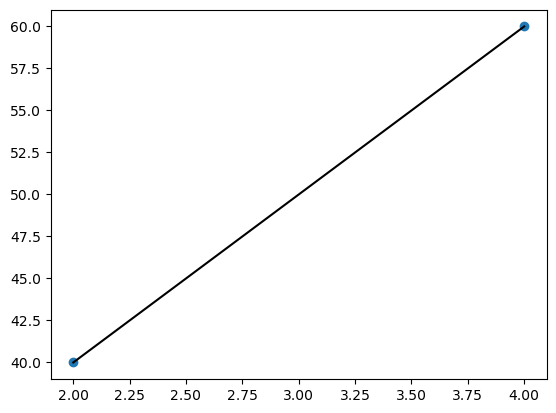

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x, Y)
plt.plot(x, 10*x + 20, 'k') # 선형회귀분석
plt.show()

## 6.2 선형연립방정식 풀기(회귀분석)(독립변수 1, 데이터 n)

In [33]:
import numpy as np
x = [32,64,96,118,126,144,152.5,158]
y = [18,24,61.5,49,52,105,130.3,125]
x = np.array(x)
y = np.array(y)
X = np.stack((x,np.ones(len(x))),axis = 1) # 8행 2열 
X = np.c_[x,np.ones(len(x))] # 8행 2열 => 정방행렬 X
X, X.shape

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 (8, 2))

In [43]:
# (X의 역행렬 @ (X.T @ X)) @ wb = X의 역행렬 @ (X.T @ Y)
# np.linalg.inv(X) X가 정방행렬이 아니면 역행렬을 구할 수 없음.

In [44]:
X.T, X.transpose()

(array([[ 32. ,  64. ,  96. , 118. , 126. , 144. , 152.5, 158. ],
        [  1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ]]),
 array([[ 32. ,  64. ,  96. , 118. , 126. , 144. , 152.5, 158. ],
        [  1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ]]))

In [48]:
# X가 정방행렬이 아닐 경우 역행렬을 구할 수 없어 전치행렬(X.T)을 내적시켜서 정방행렬로 만들어준다.
X_ = X.T@X
X_
# np.linalg.inv(X_)@X_ = np.eye(n)형태

array([[1.00000000e+00, 1.38777878e-17],
       [0.00000000e+00, 1.00000000e+00]])

In [60]:
import numpy as np
x = [32,64,96,118,126,144,152.5,158]
y = [18,24,61.5,49,52,105,130.3,125]
x = np.array(x)
Y = np.array(y).reshape(-1,1)
X = np.stack((x,np.ones(len(x))),axis = 1) # 8행 2열 
X = np.c_[x,np.ones(len(x))] # 8행 2열 => 정방행렬 X
X, X.shape

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 (8, 2))

In [81]:
# (np.linalg.inv(X.T@X) @ X.T @ X)=np.eye(n) @ wb = np.linalg.inv(X.T@X) @ X.T @ Y
# wb = np.linalg.inv(X.T@X) @ X.T @ Y
wb = np.linalg.inv((X.T@X)) @ X.T @ Y
wb
w,b = wb
w,b # 기울기와 y절편
wb[0,0], wb[1,0] # 기울기와 y절편

(0.8749312625981291, -26.79078616795418)

In [89]:
y_hat = wb[0,0] * x + wb[1,0]
y_hat
# 실제 값 y, 예측값 y_hat (or h : hypothesis)
print('독립 변수 :', x)
print('종속 변수 :', y)
print('예측 값  :', np.round(y_hat,1))

독립 변수 : [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
종속 변수 : [18, 24, 61.5, 49, 52, 105, 130.3, 125]
예측 값  : [  1.2  29.2  57.2  76.5  83.5  99.2 106.6 111.4]


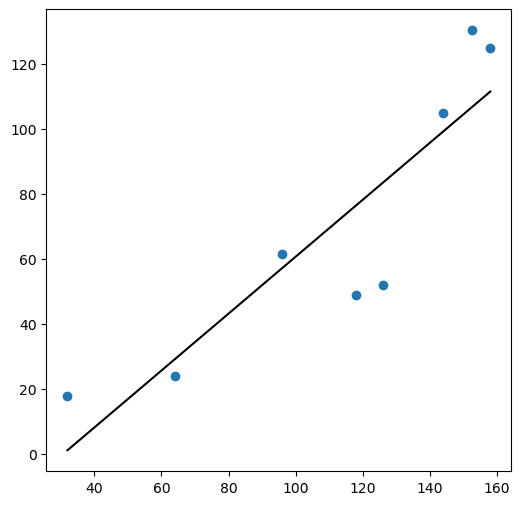

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.plot(x,y_hat, 'k')
plt.show() # => 로스 발생
# 이런 경우 x의 구간을 나눠서 여러 선형을 그려서 답을 맞춰나가며 정확도를 상승시킴 => 딥러닝 기초
# 그런데 주어진 데이터에 너무 핏하게 교육시키면 과적합(overfitting) 발생 : 훈련데이터에만 정답률이 높아진다

# 7절 연습문제

## 7.1 실습형

In [186]:
import numpy as np
from sklearn import datasets # sklearn 사이킷런
iris = datasets.load_iris()
iris_data = iris.data
iris_data
iris.keys(), iris.get('data')
# iris # 딕셔너리타입

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1

In [187]:
#1. 각 변수별 평균 출력
no_1 = np.average(iris_data, axis = 0)
no_1

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [188]:
#2. 처음 다섯개 행을 출력
no_2 = iris_data[:5]
no_2

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [189]:
#3. 처음 다섯개 행에서 마지막 열을 제외한 후 출력
no_3 = iris_data[:5,:-1]
no_3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [190]:
#4. 처음 다섯개 행에서 마지막 열 출력
no_4 = iris_data[:5,-1]
no_4

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [233]:
#5. 3번의 배열과 4번 배열을 원래 모양이 되도록 합치고 #2번과 같게 만들기
no_5 = np.hstack((no_3,no_4[:,np.newaxis]))
# 실습형 5. 3번배열과 4번배열을 원래 모양으로 합하기
answer1 = np.c_[ex3,ex4]
answer2 = np.column_stack((ex3, ex4))
answer3 = np.hstack((ex3, ex4[:, np.newaxis]))
answer4 = np.hstack( (ex3, ex4.reshape(-1,1)))
answer5 = np.concatenate( (ex3, ex4.reshape(-1, 1)), axis=1)
no_5, np.all(no_2 == no_5)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 True)

In [242]:
#6. 처음 다섯개 행을 이용해서 각 열별로 평균보다 큰 값들만 출력하세요
no_2
avg_no_2 = np.average(no_2)
avg_no_2
display(no_2[no_2>avg_no_2]) # 전체 평균을 따짐
display(no_2[no_2>np.mean(no_2,axis=0)]) # 열별 평균을 따짐

#6.
# 실습형 6 처음 다섯개 행을 이용해서 각 열 평균보다 큰값만 출력
sample = iris_data[:5]
sample[sample > np.mean(sample, axis=0)], np.mean(sample, axis=0)

array([5.1, 3.5, 4.9, 3. , 4.7, 3.2, 4.6, 3.1, 5. , 3.6])

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

(array([5.1, 3.5, 4.9, 1.5, 5. , 3.6]), array([4.86, 3.28, 1.4 , 0.2 ]))

In [176]:
#6-2. 처음 다섯개 행을 이용해서 각 열별로 평균보다 큰 값들만 출력하세요
no_2
avg_no_2 = np.average(no_2, axis = 1)
avg_no_2
for idx, row in enumerate(no_2) :
    print(f'{idx}행의 결과', end = ' ')
    for data in row :
        if data > avg_no_2[idx] :
            print(data, end = ', ')
    print()

0행의 결과 5.1, 3.5, 
1행의 결과 4.9, 3.0, 
2행의 결과 4.7, 3.2, 
3행의 결과 4.6, 3.1, 
4행의 결과 5.0, 3.6, 


In [216]:
#6-3. 처음 다섯개 행을 이용해서 각 열별로 평균보다 큰 값들만 출력하세요 => 이 의민가..?
# print(no_2)
# avg_check = np.mean(no_2, axis = 1)
avg_2 = np.average(no_2, axis = 1)
avg_check, avg_2
answer = []
for idx,row in enumerate(no_2) :
    temp = []
    for jdx, data in enumerate(row) :
        if data > avg_2[jdx] :
            temp.append(data)
    answer.append(temp)
answer = np.array(answer)
print(answer)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


## 7.2 문제풀이형

In [141]:
# 1. 3번
import numpy as np
a = np.arange(12).reshape(3,4)
print(a.sum(axis=0))

[12 15 18 21]


In [157]:
# 2. 1번. reshape이나 resize를 통해 차원을 바꿀 수 있으나 지문은 2차원 그대로 => print냐 return이냐 묻는 문제
a = np.floor(10*np.random.random((3,4)))
print(a.ndim)
a.shape # =>(3,4) 3행 4열
print(a.ravel().ndim) # => 1차원
print(a.reshape(6,2).ndim) # => 2차원 그대로(6행 2열)
a.resize((2,6))
print(a.ndim)
print(a.T.ndim) # => 2차원 그대로(6행 2열)

2
1
2
2
2


In [158]:
# 3. 1번
a = np.arange(12).reshape(3,4)
a[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [159]:
# 4. 2번
a = np.array([1,2,3,4,5])
a[[1,3,4,]]= 0
a

array([1, 0, 3, 0, 0])

In [160]:
# 5. 2번
a = np.array([1,2,3,4,5])
b = np. array([6,7,8,9,10])
np.c_[a,b]

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

5.1
3.5
개행
4.9
3.0
개행
4.7
3.2
개행
4.6
3.1
개행
5.0
3.6
개행


## 7.3 선생님 풀이

In [217]:
import numpy as np
from sklearn import datasets # sklearn 사이킷런
iris = datasets.load_iris()
iris_data = iris.data
iris_data
iris.keys(), iris.get('data')
# iris # 딕셔너리타입

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1

In [218]:
#1.
iris_data.mean()
np.mean(iris_data, axis = 0)
np.average(iris_data, axis = 0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [220]:
#2. 
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [222]:
#3
ex3 = iris_data[:5,:-1]
ex3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [225]:
#4
ex4 =iris_data[:5,-1]

In [266]:
# 실습형 5. 3번배열과 4번배열을 원래 모양으로 합하기
answer1 = np.c_[ex3,ex4]
answer2 = np.column_stack((ex3, ex4))
answer3 = np.hstack((ex3, ex4[:, np.newaxis]))
answer4 = np.hstack( (ex3, ex4.reshape(-1,1)))
answer5 = np.concatenate( (ex3, ex4.reshape(-1, 1)), axis=1)
# np.all(answer1 == answer2) and np.all(answer2==answer3)
# answers = [answer1, answer2, answer3, answer4,answer5]
# all(np.all(answer1 == answer) for answer in answers)
same_all(answer1, answer2, answer3, answer4,answer5)

True

In [261]:
# 실습형 5번용 함수
def same_all(*answers) :
    return all(np.all(answers[0] == answer) for answer in answers) if len(answers) > 0 else False

#### ★ 각 열의 평균보다 큰 값을 출력하기 : 배열 논리 인덱스 사용하기

In [295]:
#6.
# 실습형 6 처음 다섯개 행을 이용해서 각 열 평균보다 큰값만 출력
sample = iris_data[:5].copy() # 기준
np.mean(sample, axis = 0) # 열 평균
sample[sample > np.mean(sample, axis=0)]
sample, sample>np.mean(sample, axis=0), sample[sample > np.mean(sample, axis=0)], np.mean(sample, axis=0)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([[ True,  True, False, False],
        [ True, False, False, False],
        [False, False, False, False],
        [False, False,  True, False],
        [ True,  True, False, False]]),
 array([5.1, 3.5, 4.9, 1.5, 5. , 3.6]),
 array([4.86, 3.28, 1.4 , 0.2 ]))

In [296]:
sample[sample <= np.mean(sample, axis = 0)] = None # 결측치 타입은 실수

In [297]:
display(sample)

array([[5.1, 3.5, nan, nan],
       [4.9, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, 1.5, nan],
       [5. , 3.6, nan, nan]])

In [300]:
sample = iris_data[:5].copy() # 기준
np.where(sample > np.mean(sample, axis=0), sample, None) # (조건, True반환, False반환), 샘플 배열이 바뀌진 않음.

array([[5.1, 3.5, None, None],
       [4.9, None, None, None],
       [None, None, None, None],
       [None, None, 1.5, None],
       [5.0, 3.6, None, None]], dtype=object)

In [302]:
# 문제풀이형 5번
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
answer1 = np.c_[a,b]
answer2 = np.column_stack( [a,b] )
answer3 = np.hstack((a[:, np.newaxis], b[:, np.newaxis]))
answer4 = np.stack([a,b], axis=1)
answer5 = np.stack([a,b], axis=-1)
answers = [answer1, answer2, answer3, answer4, answer5] 
all(np.all(answer == answer1) for answer in answers)
same_all(*answers)

True